In [8]:
import pandas as pd
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt

In [89]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.272 Whale/2.9.118.16 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
    'Accept-Encoding': 'none',
    'Accept-Language': 'en-US,en;q=0.8',
    'Connection': 'keep-alive'}
response = urllib.request.urlopen(req)
html = bs(response.read(), 'lxml')
td_pgrr = html.find('td', class_='pgRR')
s = td_pgrr.a['href'].split('=')
last_page = s[-1] 
print(last_page)

666


In [93]:
url = "https://finance.naver.com/item/sise_day.nhn?code=005930"
df = pd.DataFrame()
for i in range(1, int(last_page)+1):
    page_url = '{}&page={}'.format(url, i)
    req = urllib.request.Request(page_url, headers=headers)
    response = urllib.request.urlopen(req)
    html = bs(response.read(), 'lxml')    
    df = pd.concat([df, pd.read_html(str(html), header=0)[0]])
df = df.dropna()
print(df)

            날짜       종가     전일비       시가       고가       저가         거래량
1   2022.12.23  58100.0  1000.0  58200.0  58400.0  57700.0   9801868.0
2   2022.12.22  59100.0  1100.0  58100.0  59100.0  58100.0  10720630.0
3   2022.12.21  58000.0   600.0  58700.0  59100.0  58000.0  10356971.0
4   2022.12.20  58600.0   900.0  59000.0  59100.0  58500.0   9284761.0
5   2022.12.19  59500.0     0.0  59500.0  59900.0  59100.0   7696187.0
..         ...      ...     ...      ...      ...      ...         ...
11  1996.06.29  68500.0   400.0  68100.0  69100.0  67100.0     96710.0
12  1996.06.28  68100.0  1200.0  67300.0  68500.0  67200.0    138430.0
13  1996.06.27  66900.0   800.0  67500.0  67700.0  66700.0    155450.0
1   1996.06.26  67700.0   200.0  67600.0  67900.0  66000.0    136630.0
2   1996.06.25  67500.0     0.0  66500.0  68300.0  65600.0    112960.0

[6652 rows x 7 columns]


In [94]:
df.to_csv('./samsung.csv', encoding='cp949')

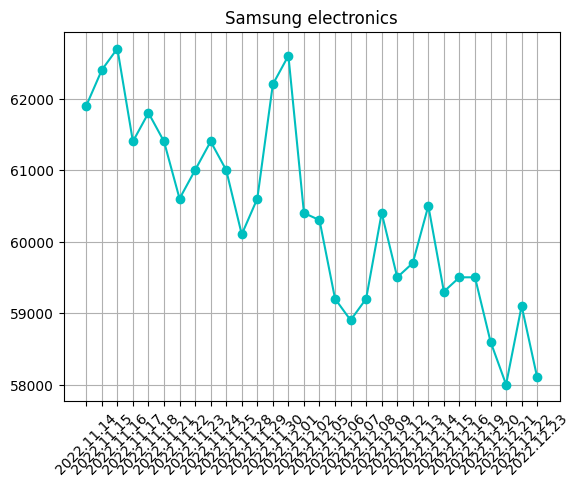

In [103]:
data = df.iloc[0:30]
data = data.sort_values(by='날짜')
plt.title('Samsung electronics')
plt.xticks(rotation=45)
plt.plot(data['날짜'], data['종가'], 'co-')
plt.grid()
plt.show()